In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
%matplotlib inline

# Setup Functions

In [2]:
# THIS WORKS!
# Implementation of https://en.wikipedia.org/wiki/Ordered_dithering
# https://gist.github.com/MehdiNS/bd41bbc6db780c9409157d35d331ac80
# https://github.com/mies47/MM-ordered_dithering/blob/master/main.py
def dither_matrix(n:int):
    if n == 1:
        return np.array([[0]])
    else:
        first = (n ** 2) * dither_matrix(int(n/2))
        second = (n ** 2) * dither_matrix(int(n/2)) + 2
        third = (n ** 2) * dither_matrix(int(n/2)) + 3
        fourth = (n ** 2) * dither_matrix(int(n/2)) + 1
        first_col = np.concatenate((first, third), axis=0)
        second_col = np.concatenate((second, fourth), axis=0)
        return (1/n**2) * np.concatenate((first_col, second_col), axis=1)

In [4]:
def ordered_dithering(img_pixel:np.array, dither_m:np.array):
    n = np.size(dither_m, axis=0)
    img_dithr = np.zeros_like(img_pixel, dtype=int)
    x_max = np.size(img_pixel, axis=1)
    y_max = np.size(img_pixel, axis=0)
    for x in range(x_max):
        for y in range(y_max):
            i = x % n
            j = y % n
            if img_pixel[y][x] > dither_m[i][j]:
                img_dithr[y][x] = 255
            else:
                img_dithr[y][x] = 0
    return img_dithr

## Setup Example

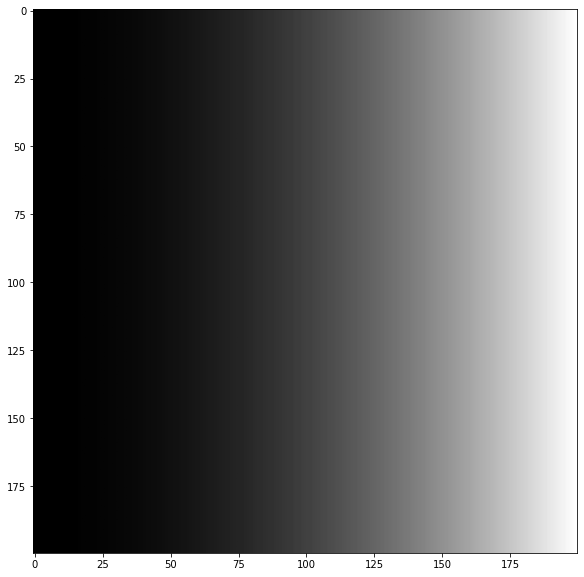

In [18]:
# X is side to side, 0 left
# Y is up/down, 0 top
xlen = 200
ylen = 200
#
x = np.arange(1,xlen+1,1)
y = (256*x**2/xlen**2)
#y = 256*((200**2-(200-x)**2)/200**2)
y = y.astype(int)
z = np.tile(y,ylen)
base_arr = z.reshape(ylen,xlen)
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(base_arr, cmap='gray')

In [22]:
bas_img = im.fromarray(base_arr)
bas_img.show()
rot_img = bas_img.rotate(-45)
rot_img.show()


In [147]:
rot_arr = np.array(rot_img)
dm = dither_matrix(8)
#dm = np.flip(dm)
#dm = np.rot90(dm)
rot_dit = ordered_dithering(rot_arr/256.0,dm)

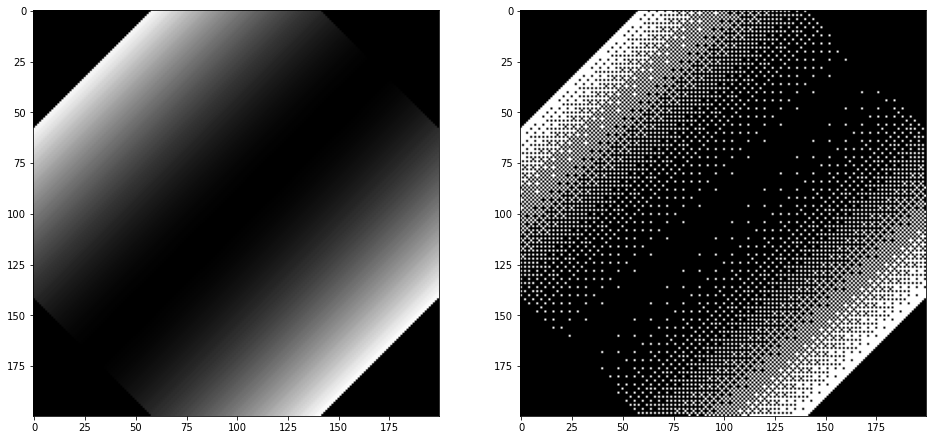

In [146]:
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
#ax_list[1].plot((0,100),(100,100),'ro')

In [35]:
# Define line that starts the data with some geom.
istart= int(200-np.cos(np.pi*45/180)*200)
istart
diag = [[], []]
x=0
for i in range(istart,-1,-1):
    y = i
    diag[0].append(x)
    diag[1].append(y)
    x+=1

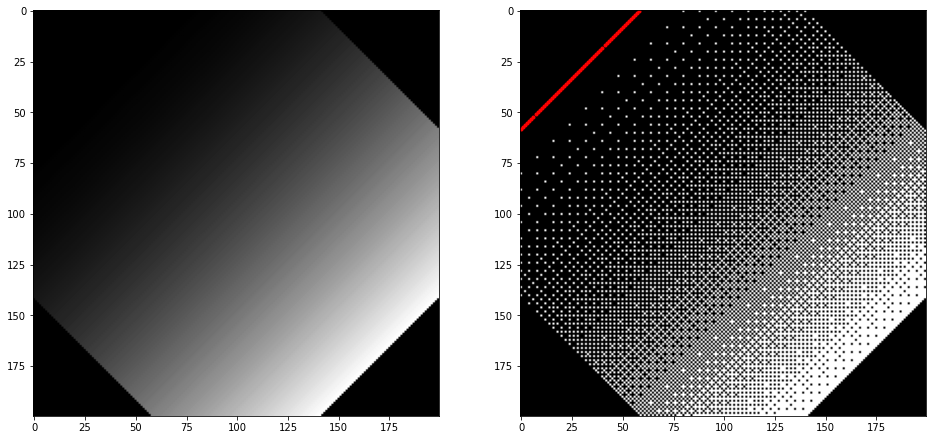

In [39]:
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
ax_list[1].plot(diag[0],diag[1],'r.')

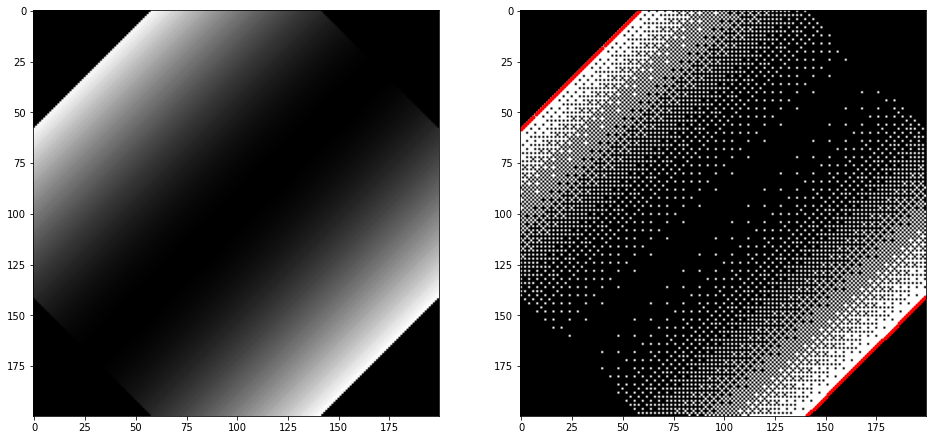

In [142]:
lowx = [199-i for i in diag[0]]
lowy = [199-i for i in diag[1]]
lowx.reverse()
lowy.reverse()
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
ax_list[1].plot(diag[0],diag[1],'r.')
ax_list[1].plot(lowx,lowy,'r.')

In [141]:
sum(sum(dm-0.5))

-0.5

## Bright to Dark to Bright

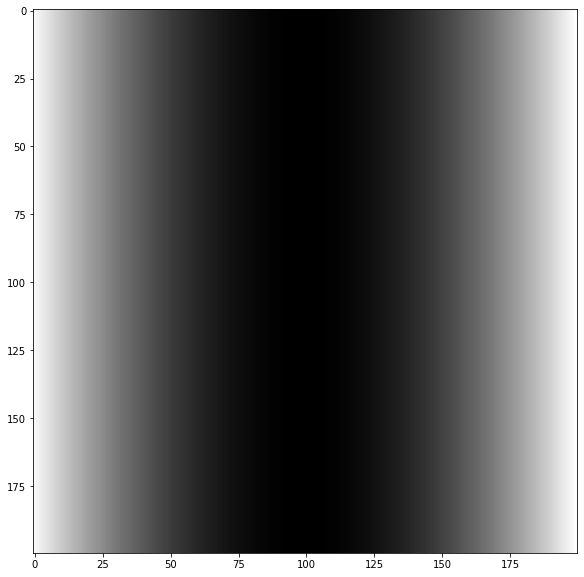

In [198]:
# X is side to side, 0 left
# Y is up/down, 0 top
xlen = 200
ylen = 200
#
x = np.arange(1,xlen+1,1)
#y = (abs(100-x))*256
y = (xlen/2-x)**2/(xlen/2)**2*256
y = y.astype(int)
z = np.tile(y,ylen)
base_arr = z.reshape(ylen,xlen)
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(base_arr, cmap='gray')

In [199]:
x_diag_start= int(xlen-np.cos(np.pi*45/180)*xlen)
xdiag = range(x_diag_start,-1,-1)
ydiag = range(0,len(xdiag),1)
#
xdiag_opp = range(xlen-x_diag_start-1,xlen,1)
ydiag_opp = range(xlen-1,xlen-x_diag_start-2,-1)
#
xlen*np.sqrt(2)

282.842712474619

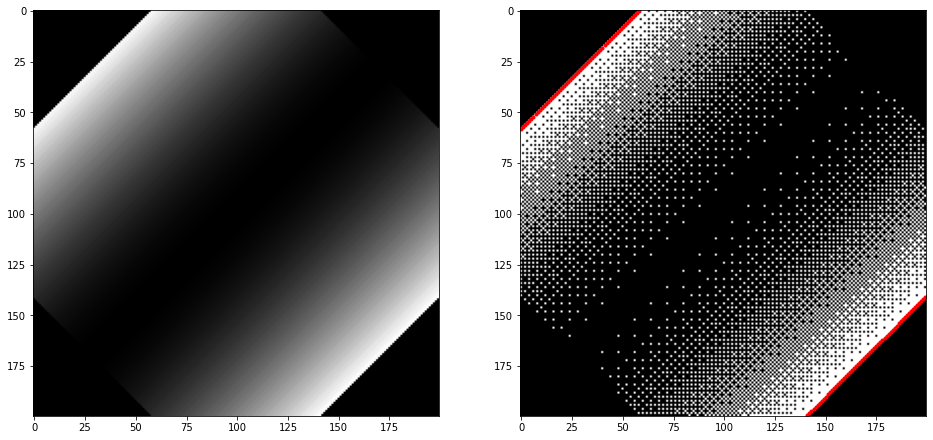

In [201]:
bas_img = im.fromarray(base_arr)
rot_img = bas_img.rotate(-45)
rot_arr = np.array(rot_img)
dm = dither_matrix(8)
#dm = np.flip(dm)
#dm = np.rot90(dm)
rot_dit = ordered_dithering(rot_arr/256.0,dm)
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
ax_list[1].plot(xdiag,ydiag,'r.')
ax_list[1].plot(xdiag_opp,ydiag_opp,'r.')

In [94]:
xs = 0
ys = 58
trace = []
for j in range(200-ys):
    trace.append((xs+j, ys+j))
print(len(trace))

142


In [135]:
check = [lowx, lowy]
for i,x in enumerate(diag[0]):
    y = diag[1][i]
    xe = check[0][i]
    ye = check[1][i]
    print(i,xe-x,ye-y)

0 141 141
1 141 141
2 141 141
3 141 141
4 141 141
5 141 141
6 141 141
7 141 141
8 141 141
9 141 141
10 141 141
11 141 141
12 141 141
13 141 141
14 141 141
15 141 141
16 141 141
17 141 141
18 141 141
19 141 141
20 141 141
21 141 141
22 141 141
23 141 141
24 141 141
25 141 141
26 141 141
27 141 141
28 141 141
29 141 141
30 141 141
31 141 141
32 141 141
33 141 141
34 141 141
35 141 141
36 141 141
37 141 141
38 141 141
39 141 141
40 141 141
41 141 141
42 141 141
43 141 141
44 141 141
45 141 141
46 141 141
47 141 141
48 141 141
49 141 141
50 141 141
51 141 141
52 141 141
53 141 141
54 141 141
55 141 141
56 141 141
57 141 141
58 141 141


In [136]:
len(check)
xe

199